In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
import io
import pandas as pd


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=df.drop(['RowNumber'],axis=1)

KeyError: ignored

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
print(df.shape)
df.nunique()

(10000, 13)


CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


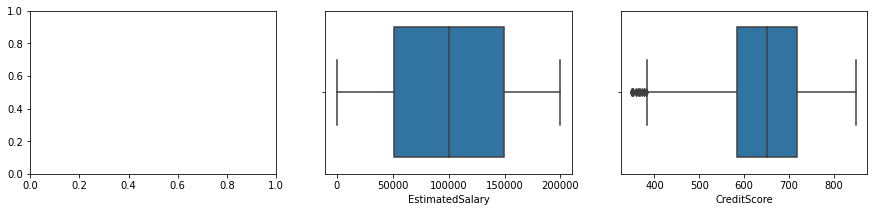

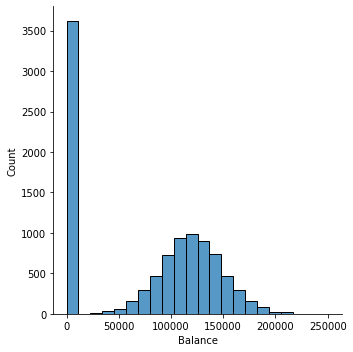

In [ ]:
fig, axes = plt.subplots(1, 3,figsize=(15,3))
sns.displot(data=df,x='Balance',ax=axes[0])
sns.boxplot(data=df,x='EstimatedSalary',ax=axes[1])
sns.boxplot(data=df,x='CreditScore',ax=axes[2])

In [ ]:
df=df.join(pd.get_dummies(df[['Geography','Gender']]))

In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [ ]:
df=df.drop(df[['CustomerId','Surname','Geography','Gender']],axis=1)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


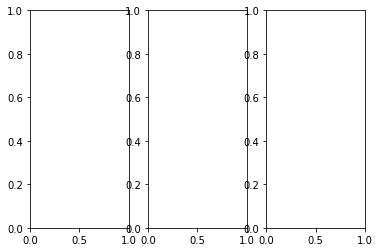

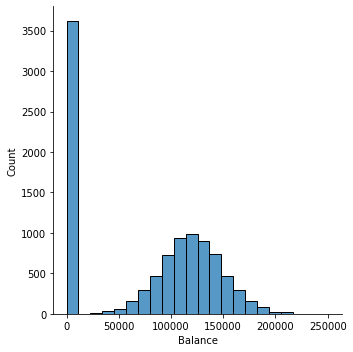

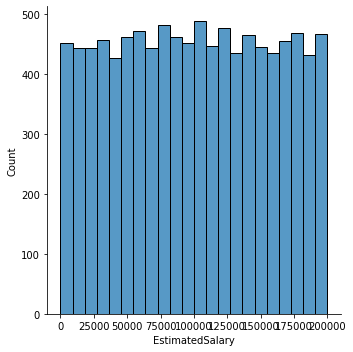

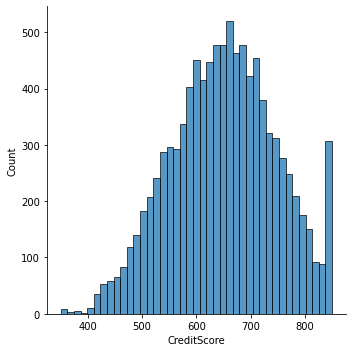

In [ ]:
fig1, axes1 = plt.subplots(1, 3)
sns.displot(data=df,x='Balance',ax=axes1[0])
sns.displot(data=df,x='EstimatedSalary',ax=axes1[1])
sns.displot(data=df,x='CreditScore',ax=axes1[2])

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler=MinMaxScaler()
df[['CreditScore','Balance','EstimatedSalary']]=mmscaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,42,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,1,0,0,0,1
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,1,0,0,0,1
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,1,0,0,1,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,0,1,0,0,1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X=df.drop('Exited',axis=1)
y=df['Exited']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
pca = PCA()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 752.1 KB


In [ ]:
clf=DecisionTreeClassifier()
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 15)},
              {'min_samples_leaf': np.arange(3,10)}]
res=GridSearchCV(clf,tree_param,cv=5)

In [ ]:

res.fit(tsne.fit_transform(X_train),y_train)
print(res.best_params_)
res.score(tsne.fit_transform(X_test),y_test)

{'criterion': 'gini', 'max_depth': 4}


0.7933333333333333

In [ ]:
from sklearn.manifold import  TSNE

In [ ]:
tsne=TSNE()